In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.models import Sequential


#LOAD DATA
from keras_preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_gen=ImageDataGenerator(rescale=1./255, zoom_range=0.2, shear_range=0.2)
test_gen=ImageDataGenerator(rescale=1./255, zoom_range=0.2, shear_range=0.2)
train_data=train_gen.flow_from_directory("/content/drive/MyDrive/DL/CNN/17_flowers/train", class_mode='categorical', batch_size=32, target_size=(64,64))
test_data=train_gen.flow_from_directory("/content/drive/MyDrive/DL/CNN/17_flowers/test", class_mode='categorical',batch_size=32,target_size=(64,64))

Found 1088 images belonging to 17 classes.
Found 272 images belonging to 17 classes.


In [11]:
LAYERS = [Conv2D(input_shape=(64,64,3), kernel_size=3, filters=6,padding='valid',activation='relu'),
          MaxPool2D(pool_size=2, strides=(2,2)),
          Conv2D(kernel_size=3, filters=8, padding='valid', activation='relu'),
          MaxPool2D(pool_size=2, strides=(2,2)),
          Conv2D(kernel_size=3, filters=16, padding='valid', activation='relu'),
          MaxPool2D(pool_size=2, strides=(2,2)),
          Conv2D(kernel_size=3, filters=64, padding='valid', activation='relu'),
          MaxPool2D(pool_size=2, strides=(2,2)),
          Flatten(),
          Dense(units=128, activation='relu'),
          Dense(units=17, activation='softmax')]

model = Sequential(LAYERS)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 6)         168       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 6)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 8)         440       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 16)        1168      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 16)        

In [13]:
model.fit(x=train_data, validation_data=test_data, epochs=50)

Epoch 1/50
34/34 [==============================] - 14s 401ms/step - loss: 2.7475 - accuracy: 0.0993 - val_loss: 2.6246 - val_accuracy: 0.1029
Epoch 2/50
34/34 [==============================] - 14s 402ms/step - loss: 2.2411 - accuracy: 0.2142 - val_loss: 2.3779 - val_accuracy: 0.1875
Epoch 3/50
34/34 [==============================] - 14s 405ms/step - loss: 2.0579 - accuracy: 0.2748 - val_loss: 2.4917 - val_accuracy: 0.1949
Epoch 4/50
34/34 [==============================] - 13s 380ms/step - loss: 1.8878 - accuracy: 0.3566 - val_loss: 2.5292 - val_accuracy: 0.1728
Epoch 5/50
34/34 [==============================] - 13s 385ms/step - loss: 1.8066 - accuracy: 0.3824 - val_loss: 2.4100 - val_accuracy: 0.2243
Epoch 6/50
34/34 [==============================] - 13s 383ms/step - loss: 1.6597 - accuracy: 0.4164 - val_loss: 2.3054 - val_accuracy: 0.2610
Epoch 7/50
34/34 [==============================] - 14s 401ms/step - loss: 1.5496 - accuracy: 0.4632 - val_loss: 2.2033 - val_accuracy: 0.3088

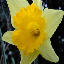

In [16]:
import numpy as np
test_img=image.load_img('/content/drive/MyDrive/DL/CNN/17_flowers/singe_predict/0/image_0065.jpg', target_size=(64,64))
test_img

In [17]:
transformed_img=np.expand_dims(image.img_to_array(test_img),axis=0)

In [18]:
np.argmax(model.predict(transformed_img))

1/1 [==============================] - 0s 21ms/step


0

In [19]:
train_data.class_indices

{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '2': 9,
 '3': 10,
 '4': 11,
 '5': 12,
 '6': 13,
 '7': 14,
 '8': 15,
 '9': 16}